In this notebook it is going to be developed a supervised classifier with true labeled data from an hospital.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# All imports here:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import pathlib
import os
import time, datetime

from random import sample

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical

#from keras_tuner.tuners import Hyperband
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers
from tensorflow.keras.layers import Dropout, Flatten, Dense, GlobalAveragePooling2D, AveragePooling2D
from tensorflow.keras import Model


from keras.callbacks import ReduceLROnPlateau

from tensorflow.keras.applications import VGG16, ResNet50
from tensorflow.keras.models import Sequential


In [ ]:
import os
# Define the folders where the images are
dataset= '/content/drive/MyDrive/hospital/train'
folders_train = os.listdir(dataset)

In [ ]:


# list to load images and labels
X_train_paper = []
y_train_paper = []
# Funtion to load images and labels
def load_data(folder, label):
    for file_i in os.listdir(folder):
        path = os.path.join(folder, file_i)
        image = cv2.imread(path)

        if image is not None:
          image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert from BGR to RGB Convertir de BGR a RGB
          image = cv2.resize(image, (224, 224))  # Resize to the same size
          X_train_paper.append(image)
          y_train_paper.append(label)
        else:
          print(path)
# load data to each folder


for  label in folders_train:
  folder = os.path.join(dataset, label)

  load_data(folder=folder, label=label)

In [ ]:
# variables
img_height = 224
img_width =224
depth = 3
BATCH_SIZE = 32
classes=len(folders_train)
labels = folders_train
inputsize = (img_height, img_width, depth)

In [ ]:
X = np.array(X_train_paper)
y = np.array(y_train_paper)

print("Forma del array de imágenes:", X.shape)
print("Forma del array de etiquetas:", y.shape)


Forma del array de imágenes: (7129, 224, 224, 3)
Forma del array de etiquetas: (7129,)


In [ ]:
# H
x_train, x_val, y_train, y_val = train_test_split(X, y, test_size=0.1,
                                                    shuffle=True, stratify=y ,random_state=42)


print(x_train.shape)
print(y_train.shape)
print(x_val.shape)
print(y_val.shape)

(6416, 224, 224, 3)
(6416,)
(713, 224, 224, 3)
(713,)


In [ ]:
# Convert to one-hot encoding
label_encoder = LabelEncoder()

print(x_train.shape)
print(y_train.shape)
print(x_val.shape)
print(y_val.shape)

y_train_encoded = label_encoder.fit_transform(y_train)
y_train_one_hot = to_categorical(y_train_encoded, num_classes=6)


y_val_encoded = label_encoder.fit_transform(y_val)
y_val_one_hot = to_categorical(y_val_encoded, num_classes=6)
# Normalize the pixel values 
x_train = x_train.astype("float") / 255.0
x_val = x_val.astype("float") / 255.0


(6416, 224, 224, 3)
(6416,)
(713, 224, 224, 3)
(713,)


In [ ]:
dataset= '/content/drive/MyDrive/hospital/test'
folders_test = os.listdir(dataset)

# list to load images and labels
X_test = []
y_test = []
# Funtion to load images and labels
def load_data(folder, label):
    for file_i in os.listdir(folder):
        path = os.path.join(folder, file_i)
        image = cv2.imread(path)

        if image is not None:
          image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert from BGR to RGB Convertir de BGR a RGB
          image = cv2.resize(image, (224, 224))  # Resize to the same size
          X_test.append(image)
          y_test.append(label)
        else:
          print(path)
# load data to each folder

for  label in folders_test:
  folder = os.path.join(dataset, label)

  load_data(folder=folder, label=label)
  print(f"{label}----{folder}")

other----/content/drive/MyDrive/hospital/test/other
maternal_cervix----/content/drive/MyDrive/hospital/test/maternal_cervix
thorax----/content/drive/MyDrive/hospital/test/thorax
femur----/content/drive/MyDrive/hospital/test/femur
abdomen----/content/drive/MyDrive/hospital/test/abdomen
brain----/content/drive/MyDrive/hospital/test/brain


In [ ]:

dataset=  '/content/drive/MyDrive/dataset_train_test/train'
folders = os.listdir(dataset)

# list to load images and labels
X_test_paper = []
y_test_paper = []
# Funtion to load images and labels
def load_data(folder, label):
    for file_i in os.listdir(folder):
        path = os.path.join(folder, file_i)
        image = cv2.imread(path)

        if image is not None:
          image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert from BGR to RGB Convertir de BGR a RGB
          image = cv2.resize(image, (224, 224))  # Resize to the same size
          X_test_paper.append(image)
          y_test_paper.append(label)
        else:
          print(path)
# load data to each folder

for  label in folders:
  folder = os.path.join(dataset, label)

  load_data(folder=folder, label=label)
  print(f"{label}----{folder}")


In [ ]:

dataset=  '/content/drive/MyDrive/real_images'
folders = os.listdir(dataset)

# list to load images and labels
X_test_2 = []
y_test_2 = []
# Funtion to load images and labels
def load_data(folder, label):
    for file_i in os.listdir(folder):
        path = os.path.join(folder, file_i)
        image = cv2.imread(path)

        if image is not None:
          image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert from BGR to RGB Convertir de BGR a RGB
          image = cv2.resize(image, (224, 224))  # Resize to the same size
          X_test_2.append(image)
          y_test_2.append(label)
        else:
          print(path)
# load data to each folder

for  label in folders:
  folder = os.path.join(dataset, label)

  load_data(folder=folder, label=label)
  print(f"{label}----{folder}")


In [ ]:
# Load testing data from the paper (without 600 images for train)
X_test_2 = np.array(X_test_2)
y_test_2 = np.array(y_test_2)
print("Forma del array de imágenes para test:", X_test_2.shape)
print("Forma del array de etiquetas para test:", y_test_2.shape)

label_encoder = LabelEncoder()
y_test_encoded2 = label_encoder.fit_transform(y_test_2)
y_test_one_hot_p2 = to_categorical(y_test_encoded2, num_classes=6)
print(X_test_2.shape)
print(y_test_2.shape)

(11800, 224, 224, 3)
(11800,)


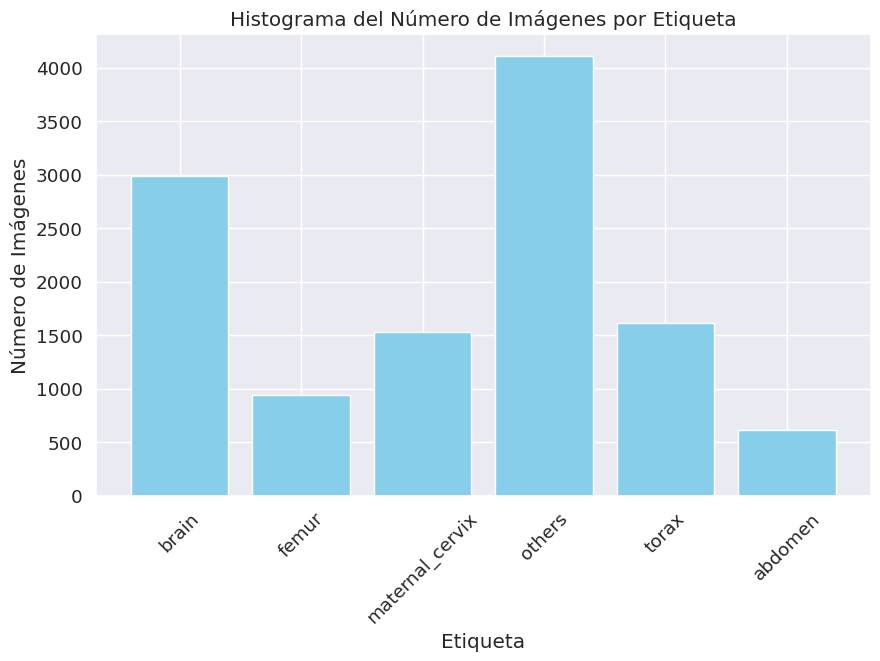

In [ ]:
import os
import matplotlib.pyplot as plt


root_dir = dataset

#  list o f labels which are the names of the subdirectories 
labels = [label for label in os.listdir(root_dir) if os.path.isdir(os.path.join(root_dir, label))]

# Ccount the number of images per label
count_labels = {}
for label in labels:
    label_dir = os.path.join(root_dir, label)
    num_images = len(os.listdir(label_dir))
    count_labels[label] = num_images

# Gshow the histogram
plt.figure(figsize=(10, 6))
plt.bar(count_labels.keys(), count_labels.values(), color='skyblue')
plt.xlabel('Etiqueta')
plt.ylabel('Número de Imágenes')
plt.title('Histograma del Número de Imágenes por Etiqueta')
plt.xticks(rotation=45)
plt.show()


In [ ]:
X_test = np.array(X_test)
y_test = np.array(y_test)
print("Forma del array de imágenes para test:", X_test.shape)
print("Forma del array de etiquetas para test:", y_test.shape)

label_encoder = LabelEncoder()
y_test_encoded = label_encoder.fit_transform(y_test)
y_test_one_hot_p = to_categorical(y_test_encoded, num_classes=6)
print(X_test.shape)
print(y_test.shape)
x_test = X_test.astype("float") / 255.0

Forma del array de imágenes para test: (5271, 224, 224, 3)
Forma del array de etiquetas para test: (5271,)
(5271, 224, 224, 3)
(5271,)


In [ ]:

datagen = ImageDataGenerator(
    rotation_range=15, # grados de rotacion aleatoria
    width_shift_range=0.1, # fraccion del total (1) para mover la imagen
    height_shift_range=0.1, # fraccion del total (1) para mover la imagen
    horizontal_flip=True, # girar las imagenes horizontalmente (eje vertical)
    shear_range=0.1, # deslizamiento
    zoom_range=0.2, # rango de zoom
    channel_shift_range=0.3, # cambios aleatorios en los canales de la imagen
     validation_split=0.1 # no va a afectar a validación solo entrenamiento
)

In [ ]:

# documentacion https://keras.io/applications/

base_model = VGG16(weights='imagenet', include_top=False, input_shape=inputsize)

base_model.summary()

# The layers of the first 4 convolutional blocks are frozen, while the fifth one is retrained.
# We have the information about the layer names in base_model.layers.name.
for layer in base_model.layers:
  if layer.name == 'block5_conv3':
    break
  layer.trainable = False
  print('Capa ' + layer.name + ' congelada...')

# The last layer of the model is taken, and our classifier (top_model) is added to it.
last = base_model.layers[-1].output
x = Flatten()(last)
x = Dense(256, activation='relu', name='fc1')(x)
x = Dropout(0.25)(x)
x = Dense(512, activation='relu', name='fc2')(x)
x = Dense(6, activation='softmax', name='predictions')(x)
model = Model(base_model.input, x)


# Compile the moldel
optimizer = Adam(lr=0.001) #0.00005
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Vaisualize the model

model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

Capa input_2 congelada...
Capa block1_conv1 congelada...
Capa block1_conv2 congelada...
Capa block1_pool congelada...
Capa block2_conv1 congelada...
Capa block2_conv2 congelada...
Capa block2_pool congelada...
Capa block3_conv1 congelada...
Capa block3_conv2 congelada...
Capa block3_conv3 congelada...
Capa block3_pool congelada...
Capa block4_conv1 congelada...
Capa block4_conv2 congelada...
Capa block4_conv3 congelada...
Capa block4_pool congelada...
Capa block5_conv1 congelada...
Capa block5_conv2 congelada...
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
     

In [ ]:
PATH_TO_SAVE= '/content/drive/MyDrive/Colab Notebooks/TFM/results_true_label'

In [ ]:

log_dir = PATH_TO_SAVE+ "/logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)


lr_reduce = ReduceLROnPlateau(monitor='val_categorical_accuracy', factor=0.6, patience=8, verbose=1, mode='min', min_lr=5e-5)

checkpoint_filepath = PATH_TO_SAVE+"/"+"{epoch:03d}_weights-improvement.h5" #pathout+"/model_checkpoint.h5" #datetime.datetime.now().strftime("%Y%m%d-%H%M%S"
checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_filepath, monitor='loss', verbose=1, save_best_only=True, mode='min')
callbacks_list = [checkpoint, lr_reduce]

[INFO]: Entrenando la red...
Epoch 1/15
91/91 [==============================] - ETA: 0s - loss: 0.2225 - accuracy: 0.9280
Epoch 1: loss improved from inf to 0.22250, saving model to /content/drive/MyDrive/Colab Notebooks/TFM/results_true_label/001_weights-improvement.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


91/91 [==============================] - 61s 670ms/step - loss: 0.2225 - accuracy: 0.9280 - val_loss: 0.7424 - val_accuracy: 0.8592 - lr: 0.0010
Epoch 2/15
91/91 [==============================] - ETA: 0s - loss: 0.2390 - accuracy: 0.9304
Epoch 2: loss did not improve from 0.22250
91/91 [==============================] - 59s 652ms/step - loss: 0.2390 - accuracy: 0.9304 - val_loss: 0.4555 - val_accuracy: 0.9014 - lr: 0.0010
Epoch 3/15
91/91 [==============================] - ETA: 0s - loss: 0.2279 - accuracy: 0.9295
Epoch 3: loss did not improve from 0.22250
91/91 [==============================] - 59s 648ms/step - loss: 0.2279 - accuracy: 0.9295 - val_loss: 0.4078 - val_accuracy: 0.8592 - lr: 0.0010
Epoch 4/15
91/91 [==============================] - ETA: 0s - loss: 0.2121 - accuracy: 0.9375
Epoch 4: loss improved from 0.22250 to 0.21211, saving model to /content/drive/MyDrive/Colab Notebooks/TFM/results_true_label/004_weights-improvement.h5
91/91 [==============================] - 61s

<Figure size 640x480 with 0 Axes>

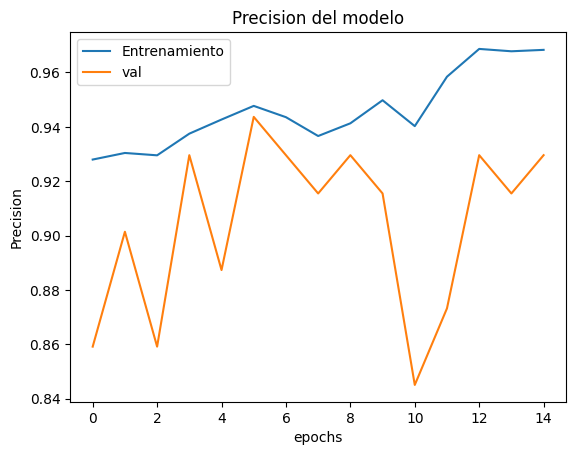

<Figure size 640x480 with 0 Axes>

In [ ]:
print("[INFO]: Entrenando la red...")
H = model.fit(datagen.flow(x_train, y_train_one_hot, batch_size=64,
         subset='training'), # indicar que es de training por haber hecho validation split
         validation_data=datagen.flow(x_val, y_val_one_hot,
         batch_size=64, subset='validation'),
          epochs=15, callbacks=[tensorboard_callback, callbacks_list])

plt.plot(H.history['accuracy'])
plt.plot(H.history['val_accuracy'])
plt.title('Precision del modelo')
plt.ylabel('Precision')
plt.xlabel('epochs')
plt.legend(['Entrenamiento', 'val'], loc='upper left')
plt.savefig(PATH_TO_SAVE+"/accuracy.png")

plt.figure()

In [ ]:
model.save('/content/drive/MyDrive/best-true.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
model = tf.keras.models.load_model('/content/drive/MyDrive/best-true.h5')

In [ ]:

# Evaluate the model over the test dataset
print("[INFO]: Evaluando red neuronal...")
predictions = model.predict(X_test, batch_size=32)


[INFO]: Evaluando red neuronal...
165/165 [==============================] - 7s 25ms/step


In [ ]:
labels = ['adbomen', 'brain', 'femur', 'maternal_cervix', 'other', 'torax']
print(classification_report(y_test_one_hot_p.argmax(axis=1), predictions.argmax(axis=1), target_names=labels))

                 precision    recall  f1-score   support

        adbomen       0.89      0.84      0.86       358
          brain       0.98      0.99      0.99      1472
          femur       0.85      0.82      0.84       524
maternal_cervix       1.00      1.00      1.00       645
          other       0.87      0.86      0.87      1612
          torax       0.86      0.89      0.87       660

       accuracy                           0.91      5271
      macro avg       0.91      0.90      0.90      5271
   weighted avg       0.91      0.91      0.91      5271



In [ ]:
from sklearn.metrics import confusion_matrix

y_pred =  predictions.argmax(axis=1)
print('Confusion Matrix')
cm = confusion_matrix(y_test_one_hot_p.argmax(axis=1), y_pred)
print(cm)

Confusion Matrix
[[ 300    4    0    0   48    6]
 [   3 1456    1    0    8    4]
 [   0    0  431    0   93    0]
 [   1    0    0  642    2    0]
 [  28   22   76    3 1394   89]
 [   4    0    0    0   66  590]]


In [ ]:
from sklearn import metrics
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = labels)

cm_display.plot()
plt.show()

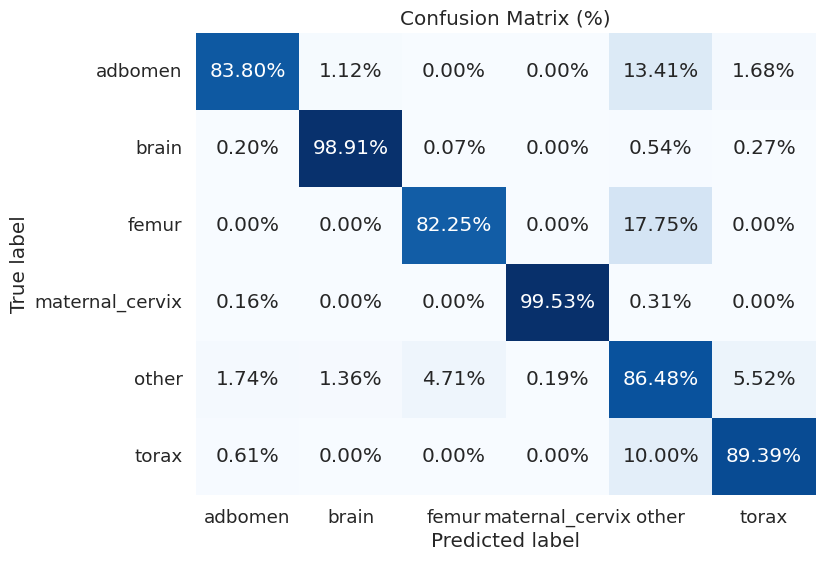

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import numpy as np


# obtain the percentages
cm_percentage = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)  
sns.heatmap(cm_percentage, annot=True, fmt=".2%", cmap="Blues", cbar=False,  xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix (%)')
plt.show()


In [ ]:
model = tf.keras.models.load_model('/content/drive/MyDrive/Colab Notebooks/TFM/results_VGG_100images-google/google-finetuned-best.h5')

In [ ]:
# Evaluate the model over the test dataset
print("[INFO]: Evaluando red neuronal...")
predictions = model.predict(X_test_2, batch_size=64)

[INFO]: Evaluando red neuronal...
185/185 [==============================] - 7s 34ms/step


In [ ]:
labels = ['adbomen', 'brain', 'femur', 'maternal_cervix', 'other', 'torax']
print(classification_report(y_test_one_hot_p2.argmax(axis=1), predictions.argmax(axis=1), target_names=labels))

                 precision    recall  f1-score   support

        adbomen       0.45      0.92      0.61       611
          brain       0.98      0.96      0.97      2992
          femur       0.53      0.93      0.67       940
maternal_cervix       0.98      1.00      0.99      1526
          other       0.92      0.41      0.57      4113
          torax       0.55      0.88      0.68      1618

       accuracy                           0.76     11800
      macro avg       0.73      0.85      0.75     11800
   weighted avg       0.83      0.76      0.75     11800



In [ ]:
from sklearn.metrics import confusion_matrix

y_pred =  predictions.argmax(axis=1)
print('Confusion Matrix')
cm = confusion_matrix(y_test_one_hot_p.argmax(axis=1), y_pred)
print(cm)

Confusion Matrix
[[ 335    0    0    0    3   20]
 [  25 1407    2    0   27   11]
 [   4    0  500    0   17    3]
 [   1    0    0  643    1    0]
 [ 226   36  244   10  667  429]
 [  32    0    1    0    8  619]]


In [ ]:
model = tf.keras.models.load_model('/content/drive/MyDrive/google-random.h5')

In [ ]:
# Evaluate the model over the test dataset
print("[INFO]: Evaluando red neuronal...")
predictions = model.predict(X_test_2, batch_size=64)

[INFO]: Evaluando red neuronal...
185/185 [==============================] - 7s 34ms/step


In [ ]:
from sklearn.metrics import confusion_matrix

y_pred =  predictions.argmax(axis=1)
print('Confusion Matrix')
cm = confusion_matrix(y_test_one_hot_p.argmax(axis=1), y_pred)
print(cm)

Confusion Matrix
[[ 509    0    0    0   24   78]
 [  31 2873    0    1   32   55]
 [   7    3  854    0   70    6]
 [   1    0    0 1523    2    0]
 [ 229   44  324   14 2474 1028]
 [  78    3    7    0   28 1502]]


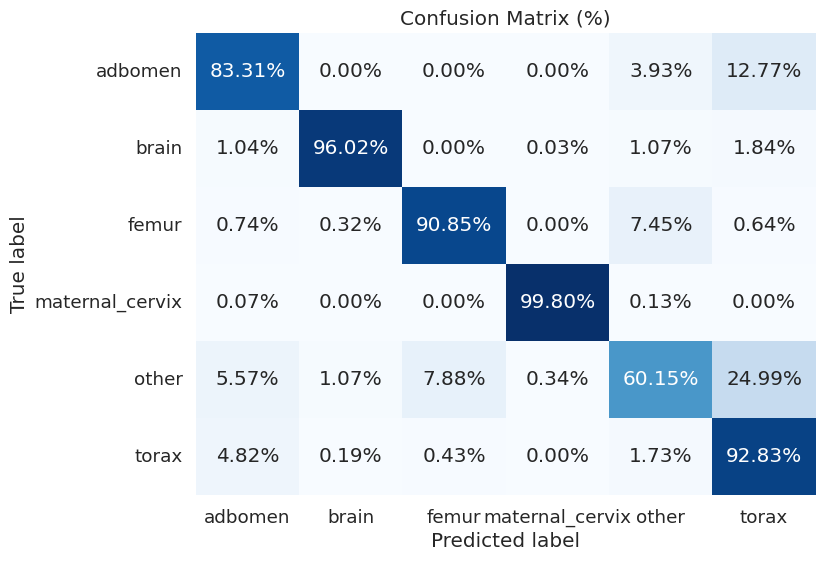

In [ ]:
# obtain the percentages
cm_percentage = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)  # Ajustar el tamaño de la fuente
sns.heatmap(cm_percentage, annot=True, fmt=".2%", cmap="Blues", cbar=False,  xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix (%)')
plt.show()